In [551]:
import pandas as pd
import numpy as np
import seaborn as sns
import matplotlib.pyplot as plt
import zipfile
from sklearn.metrics import classification_report
# from collections import Counter
# from imblearn.over_sampling import RandomOverSampler
# from sklearn.metrics import classification_report,confusion_matrix,precision_score,recall_score,accuracy_score,f1_score




In [552]:
# loading the dataset
zip_path=r'C:\Users\User\Desktop\ABEOKUTA\AI_Engineer\Machine_Learning_Project\datasets\mentalhealth.zip'

with zipfile.ZipFile(zip_path, 'r') as zip_ref:
    zip_ref.printdir()
    zip_ref.extractall('dataset')



File Name                                             Modified             Size
Student Mental health.csv                      2023-02-17 02:11:58         7339


In [553]:

with zipfile.ZipFile(zip_path) as z:
    with z.open(r'Student Mental health.csv','r') as f:
        menth = pd.read_csv(f, sep=",")
        df = menth.copy()

In [554]:
df.head(3)

,Timestamp,Choose your gender,Age,What is your course?,Your current year of Study,What is your CGPA?,Marital status,Do you have Depression?,Do you have Anxiety?,Do you have Panic attack?,Did you seek any specialist for a treatment?
0,8/7/2020 12:02,Female,18.0,Engineering,year 1,3.00 - 3.49,No,Yes,No,Yes,No
1,8/7/2020 12:04,Male,21.0,Islamic education,year 2,3.00 - 3.49,No,No,Yes,No,No
2,8/7/2020 12:05,Male,19.0,BIT,Year 1,3.00 - 3.49,No,Yes,Yes,Yes,No


In [555]:
df.shape 

(101, 11)

In [556]:
df.dtypes

Timestamp                                        object
Choose your gender                               object
Age                                             float64
What is your course?                             object
Your current year of Study                       object
What is your CGPA?                               object
Marital status                                   object
Do you have Depression?                          object
Do you have Anxiety?                             object
Do you have Panic attack?                        object
Did you seek any specialist for a treatment?     object
dtype: object

In [557]:
df.describe().T

,count,mean,std,min,25%,50%,75%,max
Age,100.0,20.53,2.49628,18.0,18.0,19.0,23.0,24.0


In [558]:
df.isnull().sum()

Timestamp                                       0
Choose your gender                              0
Age                                             1
What is your course?                            0
Your current year of Study                      0
What is your CGPA?                              0
Marital status                                  0
Do you have Depression?                         0
Do you have Anxiety?                            0
Do you have Panic attack?                       0
Did you seek any specialist for a treatment?    0
dtype: int64

In [559]:
df['Age'] = df['Age'].fillna(df['Age'].mean())
df['Age'].isnull().sum()

np.int64(0)

In [560]:
df.columns # WE will rename these columns

Index(['Timestamp', 'Choose your gender', 'Age', 'What is your course?',
       'Your current year of Study', 'What is your CGPA?', 'Marital status',
       'Do you have Depression?', 'Do you have Anxiety?',
       'Do you have Panic attack?',
       'Did you seek any specialist for a treatment?'],
      dtype='object')

In [561]:
df.columns = ['Date_Time', 'Gender', 'Age', 'Course', 'Year', 'CGPA', 'Marital_Status', 'Depression', 'Anxiety', 'Panic_Attack', 'Treatment']
df.columns

Index(['Date_Time', 'Gender', 'Age', 'Course', 'Year', 'CGPA',
       'Marital_Status', 'Depression', 'Anxiety', 'Panic_Attack', 'Treatment'],
      dtype='object')

In [562]:
df.head(1) # Renamed columns

,Date_Time,Gender,Age,Course,Year,CGPA,Marital_Status,Depression,Anxiety,Panic_Attack,Treatment
0,8/7/2020 12:02,Female,18.0,Engineering,year 1,3.00 - 3.49,No,Yes,No,Yes,No


In [563]:
df['Year'].unique() # year 1 and Year 1 are the same.We will only keep the year 

array(['year 1', 'year 2', 'Year 1', 'year 3', 'year 4', 'Year 2',
       'Year 3'], dtype=object)

In [564]:
df['Year'] = df['Year'].apply(lambda x : int(x.split(' ')[-1]))
df['Year'].unique()

array([1, 2, 3, 4])

In [565]:
df.head(3)

,Date_Time,Gender,Age,Course,Year,CGPA,Marital_Status,Depression,Anxiety,Panic_Attack,Treatment
0,8/7/2020 12:02,Female,18.0,Engineering,1,3.00 - 3.49,No,Yes,No,Yes,No
1,8/7/2020 12:04,Male,21.0,Islamic education,2,3.00 - 3.49,No,No,Yes,No,No
2,8/7/2020 12:05,Male,19.0,BIT,1,3.00 - 3.49,No,Yes,Yes,Yes,No


In [566]:
df['CGPA'].unique() #  '3.50 - 4.00', '3.50 - 4.00 ' are same . We have to remove the trailling spaces

array(['3.00 - 3.49', '3.50 - 4.00', '3.50 - 4.00 ', '2.50 - 2.99',
       '2.00 - 2.49', '0 - 1.99'], dtype=object)

In [567]:
df['CGPA'] = df['CGPA'].apply(lambda x : x.strip())
df['CGPA'].unique() 

array(['3.00 - 3.49', '3.50 - 4.00', '2.50 - 2.99', '2.00 - 2.49',
       '0 - 1.99'], dtype=object)

In [568]:
# To see the no of courses students are enrolled in

Course_List = df['Course'].unique().tolist()
print(len(Course_List)) 

df['Course'].unique() # There are multiple courses with the same name. 



49


array(['Engineering', 'Islamic education', 'BIT', 'Laws', 'Mathemathics',
       'Pendidikan islam', 'BCS', 'Human Resources', 'Irkhs',
       'Psychology', 'KENMS', 'Accounting ', 'ENM', 'Marine science',
       'KOE', 'Banking Studies', 'Business Administration', 'Law',
       'KIRKHS', 'Usuluddin ', 'TAASL', 'Engine', 'ALA',
       'Biomedical science', 'koe', 'Kirkhs', 'BENL', 'Benl', 'IT', 'CTS',
       'engin', 'Econs', 'MHSC', 'Malcom', 'Kop', 'Human Sciences ',
       'Biotechnology', 'Communication ', 'Diploma Nursing',
       'Pendidikan Islam ', 'Radiography', 'psychology', 'Fiqh fatwa ',
       'DIPLOMA TESL', 'Koe', 'Fiqh', 'Islamic Education', 'Nursing ',
       'Pendidikan Islam'], dtype=object)

{
    'engineering': 'Engineering',
    'islamic education': 'Islamic Education',
    'bit': 'BIT',
    'laws': 'Law',
    'mathemathics': 'Mathematics',
    'pendidikan islam': 'Islamic Education',
    'bcs': 'BCS',
    'human resources': 'Human Resources',
    'irkhs': 'IRKHS',
    'psychology': 'Psychology',
    'kenms': 'KENMS',
    'accounting': 'Accounting',
    'enm': 'ENM',
    'marine science': 'Marine Science',
    'koe': 'KOE',
    'banking studies': 'Banking Studies',
    'business administration': 'Business Administration',
    'kirkhs': 'KIRKHS',
    'usuluddin': 'Usuluddin',
    'taasl': 'TAASL',
    'engine': 'Engineering',
    'ala': 'ALA',
    'biomedical science': 'Biomedical Science',
    'benl': 'BENL',
    'it': 'IT',
    'cts': 'CTS',
    'econs': 'Economics',
    'mhsc': 'MHSC',
    'malcom': 'MALCOM',
    'kop': 'KOP',
    'human sciences': 'Human Sciences',
    'biotechnology': 'Biotechnology',
    'communication': 'Communication',
    'diploma nursing': 'Diploma Nursing',
    'pendidikan islam': 'Islamic Education',
    'radiography': 'Radiography',
    'fiqh fatwa': 'Fiqh Fatwa',
    'diploma tesl': 'Diploma TESL',
    'fiqh': 'Fiqh',
    'nursing': 'Nursing',
    'engin': 'Engineering' , 'Engine':'Engineering' , 'Islamic education':'Islamic Education' , 
              'Pendidikan islam':'Pendidikan Islam' , 'BIT':'IT', 'psychology':'Psychology', 'koe': 'Koe', 
              'Kirkhs': 'Irkhs', 'KIRKHS': 'Irkhs', 'Benl': 'BENL', 'Fiqh fatwa ': 'Fiqh', 'Laws': 'Law'
}

In [569]:
course_dic = {
    'engineering': 'Engineering',
    'islamic education': 'Islamic Education',
    'bit': 'BIT',
    'laws': 'Law',
    'mathemathics': 'Mathematics',
    'pendidikan islam': 'Islamic Education',
    'bcs': 'BCS',
    'human resources': 'Human Resources',
    'irkhs': 'IRKHS',
    'psychology': 'Psychology',
    'kenms': 'KENMS',
    'accounting': 'Accounting',
    'enm': 'ENM',
    'marine science': 'Marine Science',
    'koe': 'KOE',
    'banking studies': 'Banking Studies',
    'business administration': 'Business Administration',
    'kirkhs': 'KIRKHS',
    'usuluddin': 'Usuluddin',
    'taasl': 'TAASL',
    'engine': 'Engineering',
    'ala': 'ALA',
    'biomedical science': 'Biomedical Science',
    'benl': 'BENL',
    'it': 'IT',
    'cts': 'CTS',
    'econs': 'Economics',
    'mhsc': 'MHSC',
    'malcom': 'MALCOM',
    'kop': 'KOP',
    'human sciences': 'Human Sciences',
    'biotechnology': 'Biotechnology',
    'communication': 'Communication',
    'diploma nursing': 'Diploma Nursing',
    'pendidikan islam': 'Islamic Education',
    'radiography': 'Radiography',
    'fiqh fatwa': 'Fiqh Fatwa',
    'diploma tesl': 'Diploma TESL',
    'fiqh': 'Fiqh',
    'nursing': 'Nursing',
    'engin': 'Engineering' , 'Engine':'Engineering' , 'Islamic education':'Islamic Education' , 
              'Pendidikan islam':'Pendidikan Islam' , 'BIT':'IT', 'psychology':'Psychology', 'koe': 'Koe', 
              'Kirkhs': 'Irkhs', 'KIRKHS': 'Irkhs', 'Benl': 'BENL', 'Fiqh fatwa ': 'Fiqh', 'Laws': 'Law'
}

df['Course'].replace(course_dic,inplace=True)

C:\Users\User\AppData\Local\Temp\ipykernel_1388\4188791771.py:47: FutureWarning: A value is trying to be set on a copy of a DataFrame or Series through chained assignment using an inplace method.
The behavior will change in pandas 3.0. This inplace method will never work because the intermediate object on which we are setting values always behaves as a copy.

For example, when doing 'df[col].method(value, inplace=True)', try using 'df.method({col: value}, inplace=True)' or df[col] = df[col].method(value) instead, to perform the operation inplace on the original object.


  df['Course'].replace(course_dic,inplace=True)


In [570]:
len(df['Course'].unique().tolist()) # So in actual there are 37 unique courses 

37

In [571]:
df.sample(5)

,Date_Time,Gender,Age,Course,Year,CGPA,Marital_Status,Depression,Anxiety,Panic_Attack,Treatment
79,13/07/2020 10:10:30,Female,18.0,Engineering,4,3.50 - 4.00,No,No,No,No,No
73,9/7/2020 6:57,Male,18.0,Biomedical science,1,0 - 1.99,No,No,No,No,No
10,8/7/2020 12:39,Female,20.0,Psychology,1,3.50 - 4.00,No,No,No,No,No
42,8/7/2020 14:58,Female,20.0,Usuluddin,2,3.00 - 3.49,No,Yes,No,No,No
17,8/7/2020 12:52,Female,24.0,ENM,4,3.00 - 3.49,Yes,Yes,Yes,Yes,No


In [572]:
df['Treatment'].value_counts()

Treatment
No     95
Yes     6
Name: count, dtype: int64

In [573]:
df['Panic_Attack'].value_counts()

Panic_Attack
No     68
Yes    33
Name: count, dtype: int64

In [574]:
df['Anxiety'].value_counts()

Anxiety
No     67
Yes    34
Name: count, dtype: int64

In [575]:
df['Depression'].value_counts()

Depression
No     66
Yes    35
Name: count, dtype: int64

In [576]:
df['Marital_Status'].value_counts()

Marital_Status
No     85
Yes    16
Name: count, dtype: int64

In [577]:
df['Age'].value_counts()

Age
18.00    32
24.00    23
19.00    21
23.00    13
20.00     6
21.00     3
22.00     2
20.53     1
Name: count, dtype: int64

In [578]:
df['CGPA'].value_counts()

CGPA
3.50 - 4.00    48
3.00 - 3.49    43
2.50 - 2.99     4
0 - 1.99        4
2.00 - 2.49     2
Name: count, dtype: int64

In [579]:
df['Gender'].value_counts()

Gender
Female    75
Male      26
Name: count, dtype: int64

from the above value count it shows that about 70% of students have Anxiety , 70% has Depression and 70% has Panic Attack   but only about 16% of the students are married  while 75% of the students are females 

90% of the students are in secon class uppeer and first class.. only 10 percent fall below this classes.

In [580]:
df['Course'].value_counts() # No of students enrolled in each course

Course
Engineering                20
BCS                        18
IT                         11
KOE                         4
Biomedical science          4
Psychology                  3
BENL                        3
Law                         3
Irkhs                       3
Fiqh                        2
Islamic Education           2
Koe                         2
Pendidikan Islam            2
Mathemathics                1
ENM                         1
Banking Studies             1
Marine science              1
Business Administration     1
Accounting                  1
Human Resources             1
KENMS                       1
ALA                         1
TAASL                       1
Usuluddin                   1
CTS                         1
MHSC                        1
Malcom                      1
Kop                         1
Econs                       1
Human Sciences              1
Biotechnology               1
Diploma Nursing             1
Communication               1
Pen

the majority of respondents are in BCS,Enginnering,IT,KOE with 18,20,11,4 respectively 

In [581]:
df.columns

Index(['Date_Time', 'Gender', 'Age', 'Course', 'Year', 'CGPA',
       'Marital_Status', 'Depression', 'Anxiety', 'Panic_Attack', 'Treatment'],
      dtype='object')

i need to kniw the number of student from each level that participated 

C:\Users\User\AppData\Local\Temp\ipykernel_1388\2760216093.py:5: UserWarning: set_ticklabels() should only be used with a fixed number of ticks, i.e. after set_ticks() or using a FixedLocator.
  plot1.set_xticklabels(plot1.get_xticklabels(), rotation=45)
C:\Users\User\AppData\Local\Temp\ipykernel_1388\2760216093.py:5: UserWarning: set_ticklabels() should only be used with a fixed number of ticks, i.e. after set_ticks() or using a FixedLocator.
  plot1.set_xticklabels(plot1.get_xticklabels(), rotation=45)
C:\Users\User\AppData\Local\Temp\ipykernel_1388\2760216093.py:5: UserWarning: set_ticklabels() should only be used with a fixed number of ticks, i.e. after set_ticks() or using a FixedLocator.
  plot1.set_xticklabels(plot1.get_xticklabels(), rotation=45)
C:\Users\User\AppData\Local\Temp\ipykernel_1388\2760216093.py:5: UserWarning: set_ticklabels() should only be used with a fixed number of ticks, i.e. after set_ticks() or using a FixedLocator.
  plot1.set_xticklabels(plot1.get_xticklab

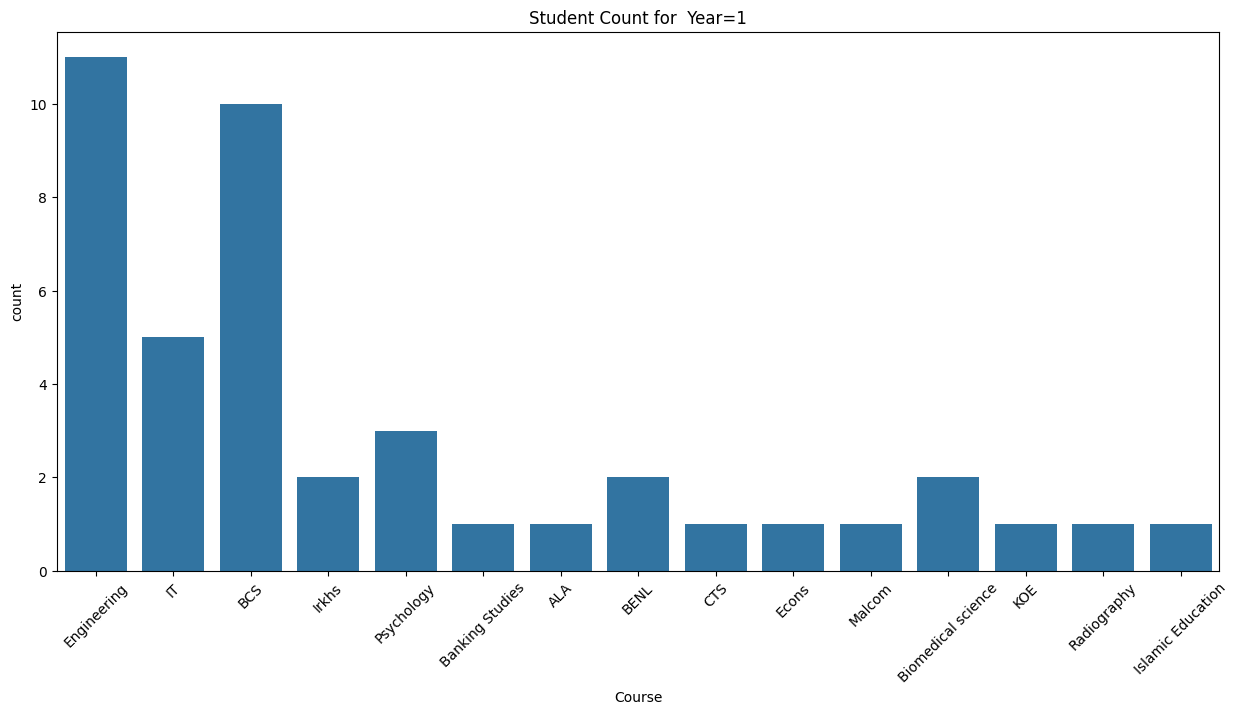

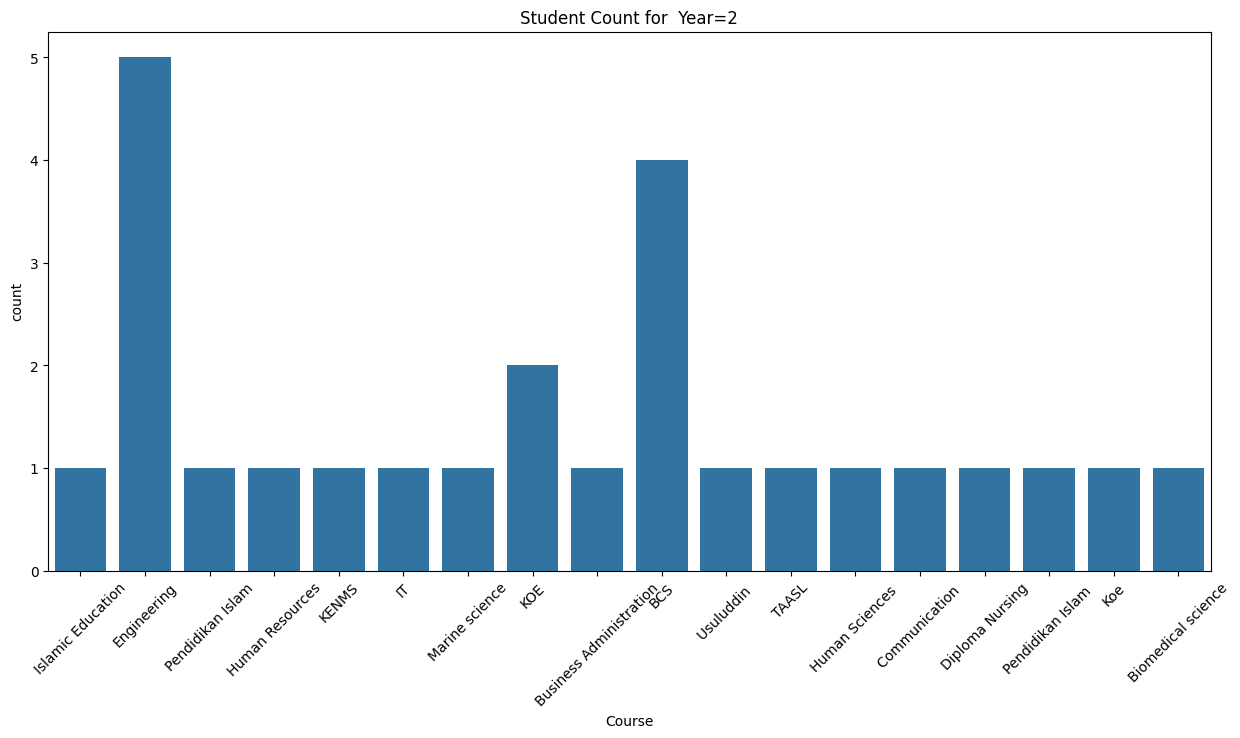

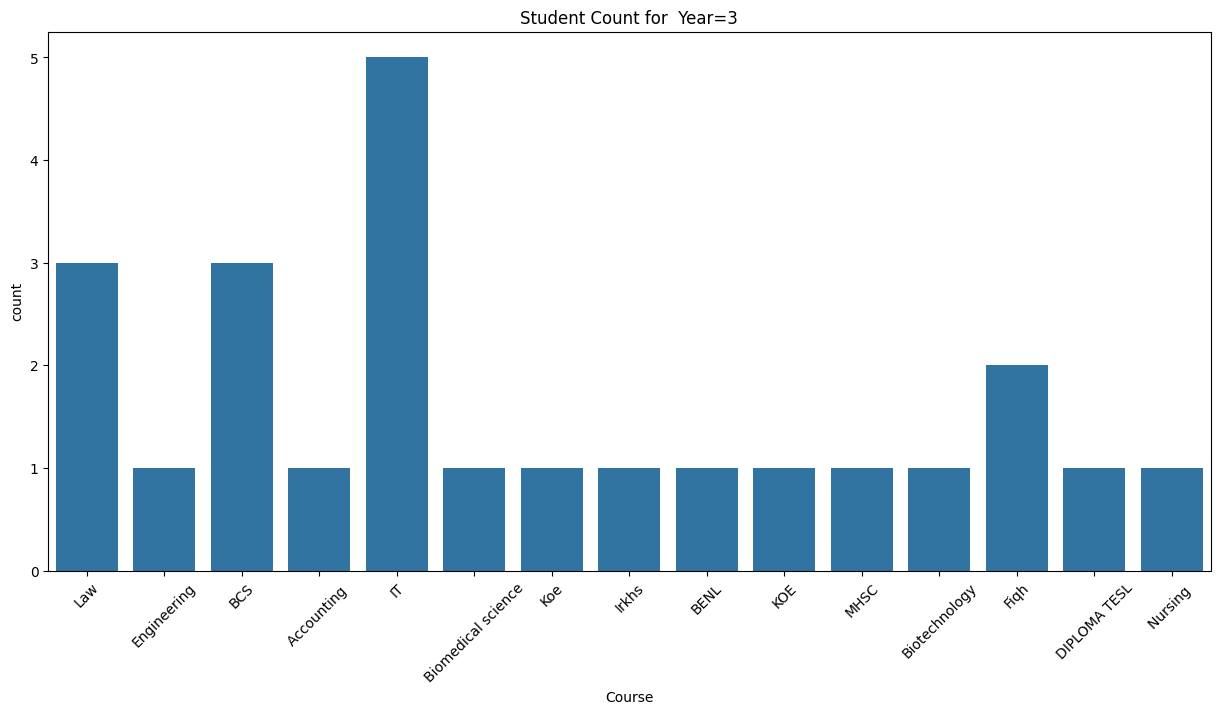

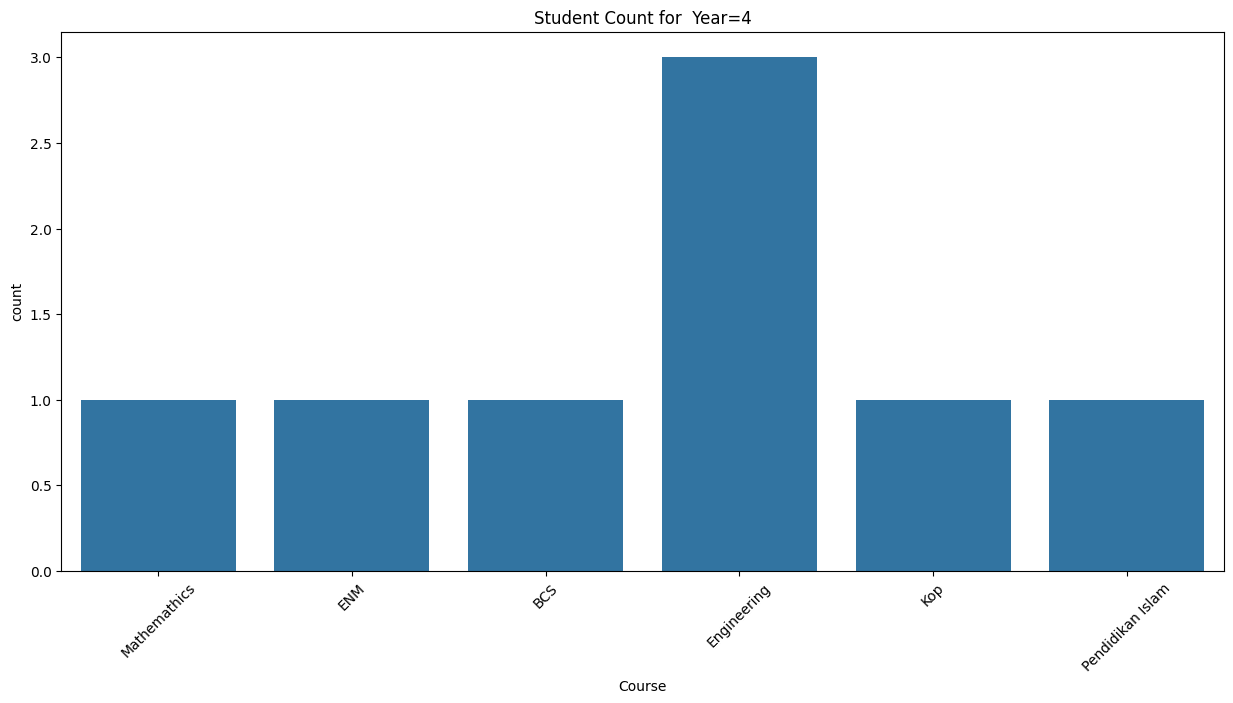

In [582]:
def plot_student_cnt(dataframe):
    for yr in dataframe['Year'].unique().tolist():
        plt.figure(figsize=(15, 7))
        plot1 = sns.countplot(x='Course',data=dataframe[dataframe['Year']==yr])
        plot1.set_xticklabels(plot1.get_xticklabels(), rotation=45)
        plot1.set_title(f'Student Count for  Year={yr}')
        
plot_student_cnt(df)

                                              From the avove Plots


Engineering students from 1,2,4 years have recorded high number in survey

Apart from Engineering, IT BCS and kde students have also appered in surveys in huge no except in year = 4

Engineering , BCS, IT had responded in the survey in max no . This also indicates that these students must be sufering from some kind of meltal health issue hence had taken the survey.

The missing courses in year = 4 must be due to the fact that these courses have 3 year duration 



# Anxiety 

In [583]:
df['Anxiety'].value_counts() # Out of 101 students 34 are suffering from anxiety

Anxiety
No     67
Yes    34
Name: count, dtype: int64

Text(0.5, 1.0, 'Course vs Anxiety')

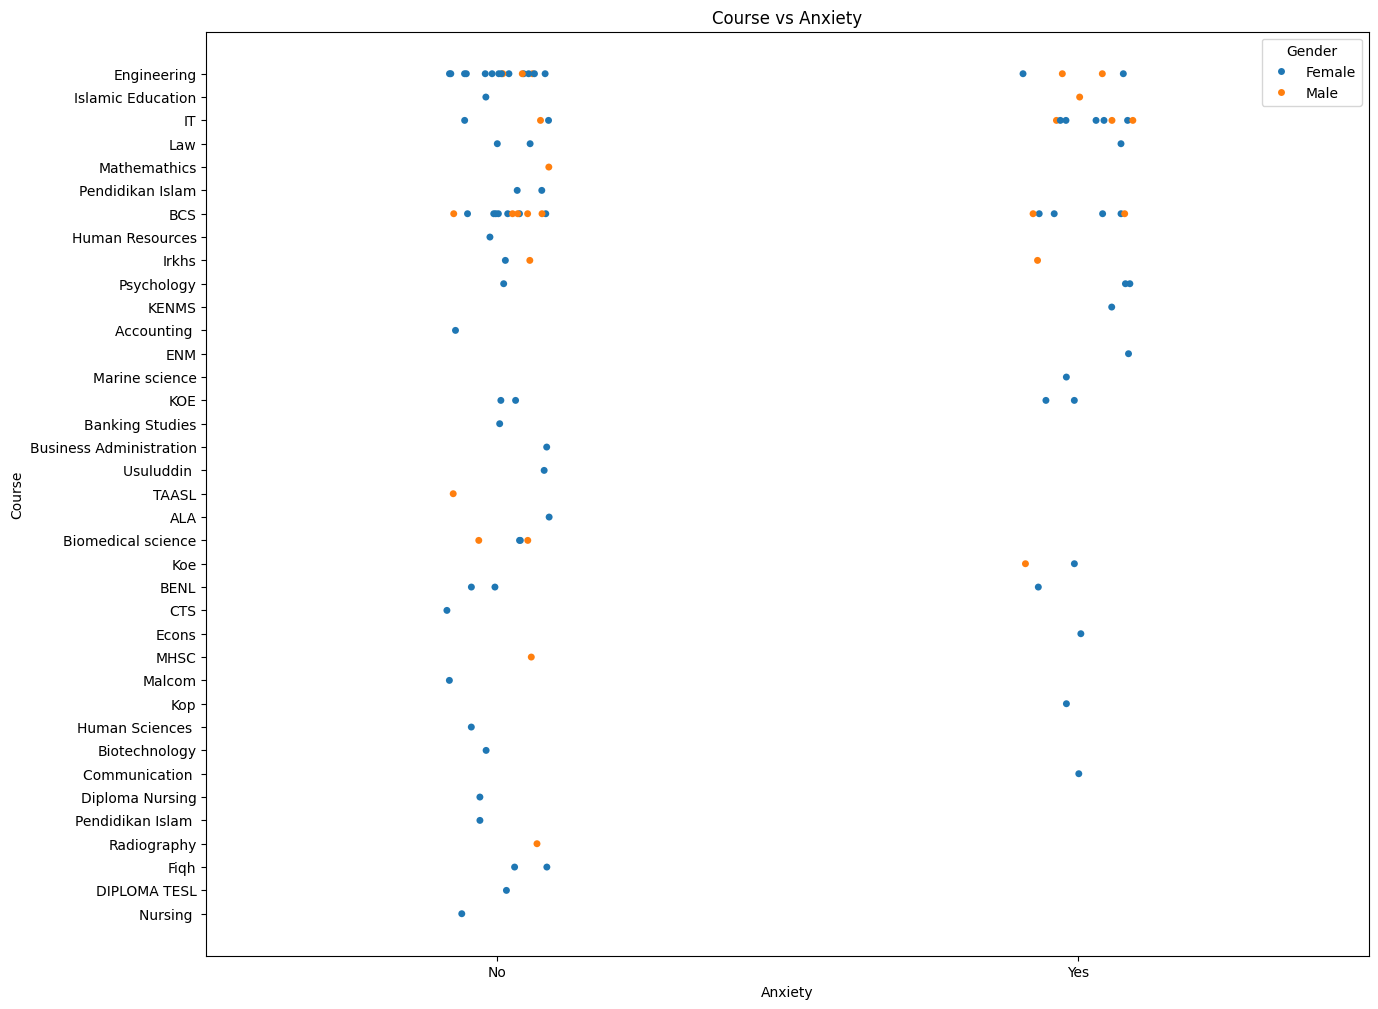

In [584]:
plt.figure(figsize=(15,12))
plot_1 = sns.stripplot(x='Anxiety',y='Course',data=df,hue='Gender')
plot_1.set_title("Course vs Anxiety")

In [585]:
print(" No Anxiety \n")
print(df[df['Anxiety']=='No']['Course'].value_counts().nlargest(5))
print("\n Anxiety \n")
print(df[df['Anxiety']=='Yes']['Course'].value_counts().nlargest(5))

 No Anxiety 

Course
Engineering           16
BCS                   12
Biomedical science     4
IT                     3
Pendidikan Islam       2
Name: count, dtype: int64

 Anxiety 

Course
IT             8
BCS            6
Engineering    4
Koe            2
KOE            2
Name: count, dtype: int64


In [586]:
df[['Anxiety','Gender']].groupby('Gender')['Anxiety'].value_counts()

Gender  Anxiety
Female  No         51
        Yes        24
Male    No         16
        Yes        10
Name: count, dtype: int64

Much more no of Female students suffer from anxiety than Male students

In [587]:
# To find the courses enrolled in where students faces no anxiety

Anx = df[df['Anxiety']=='Yes']['Course'].unique().tolist()
No_Anx = df[df['Anxiety']=='No']['Course'].unique().tolist()


set1 = set(No_Anx)
set2 = set(Anx)

print(list(sorted(set1 - set2))) 


['ALA', 'Accounting ', 'Banking Studies', 'Biomedical science', 'Biotechnology', 'Business Administration', 'CTS', 'DIPLOMA TESL', 'Diploma Nursing', 'Fiqh', 'Human Resources', 'Human Sciences ', 'MHSC', 'Malcom', 'Mathemathics', 'Nursing ', 'Pendidikan Islam', 'Pendidikan Islam ', 'Radiography', 'TAASL', 'Usuluddin ']


# Depression

In [588]:
df['Depression'].value_counts()

Depression
No     66
Yes    35
Name: count, dtype: int64

Text(0.5, 1.0, 'Course vs Depression')

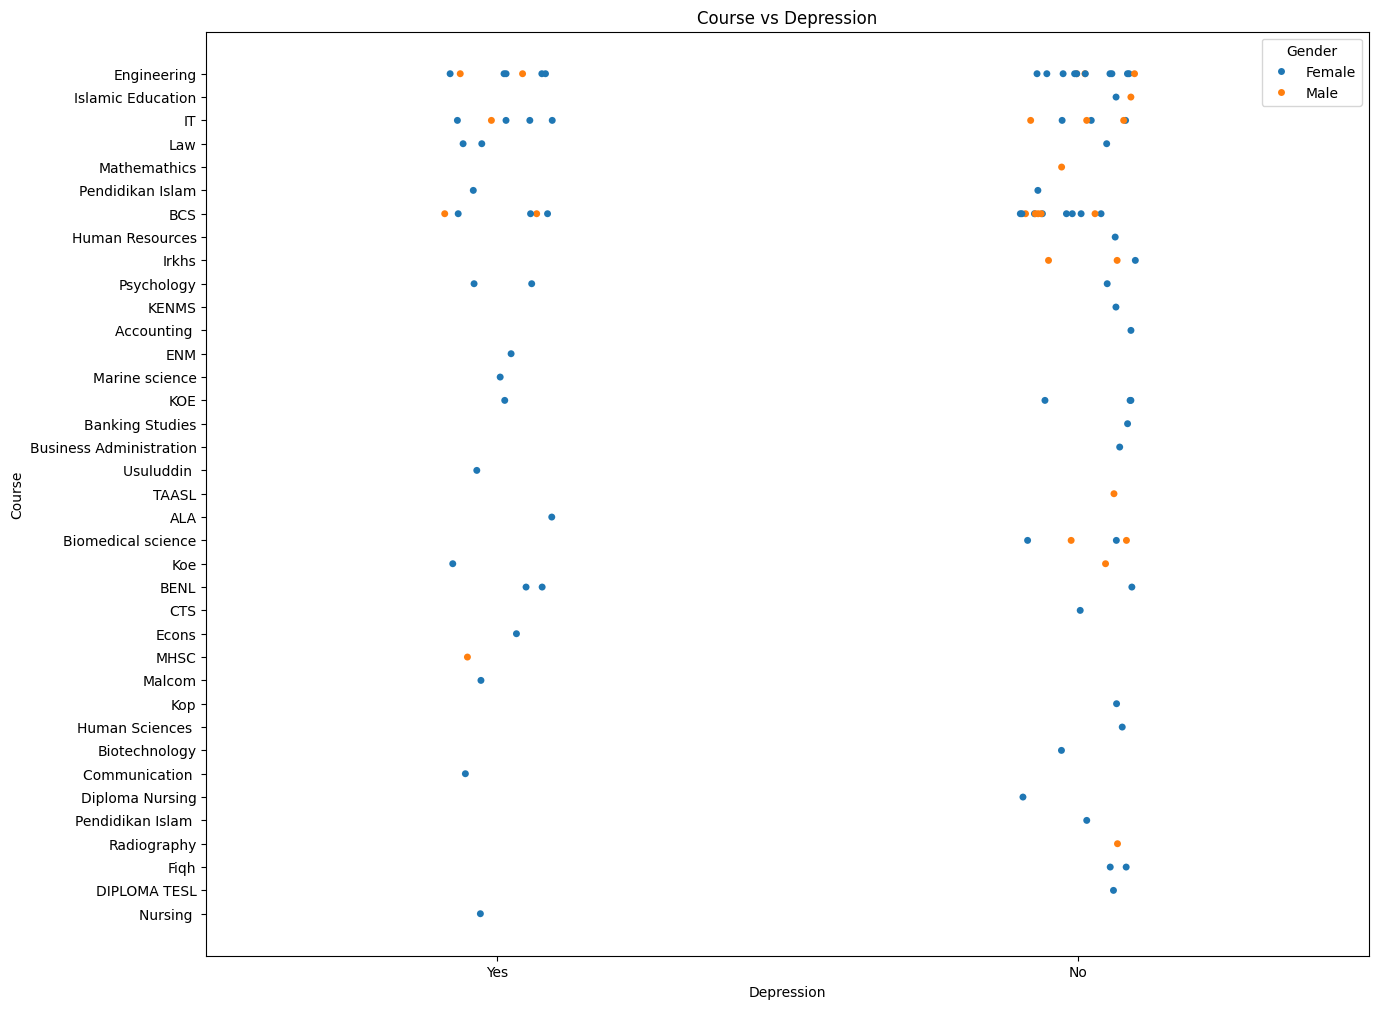

In [589]:
plt.figure(figsize=(15,12))
plot_2 = sns.stripplot(x='Depression',y='Course',data=df,hue='Gender')
plot_2.set_title("Course vs Depression")

In [590]:
print(df[df['Depression']=='Yes']['Course'].value_counts().nlargest(5))

Course
Engineering    7
IT             5
BCS            5
Law            2
Psychology     2
Name: count, dtype: int64


Engineering stuedents ranks the top in depression . BCS , IT follwing after it

In [591]:
df.columns

Index(['Date_Time', 'Gender', 'Age', 'Course', 'Year', 'CGPA',
       'Marital_Status', 'Depression', 'Anxiety', 'Panic_Attack', 'Treatment'],
      dtype='object')

In [592]:
df[['Gender','Depression']].value_counts()

Gender  Depression
Female  No            46
        Yes           29
Male    No            20
        Yes            6
Name: count, dtype: int64

Result showed Females suffer mostly from depression than males

# Panic Attacks

Text(0.5, 1.0, 'Course vs Panic_Attack')

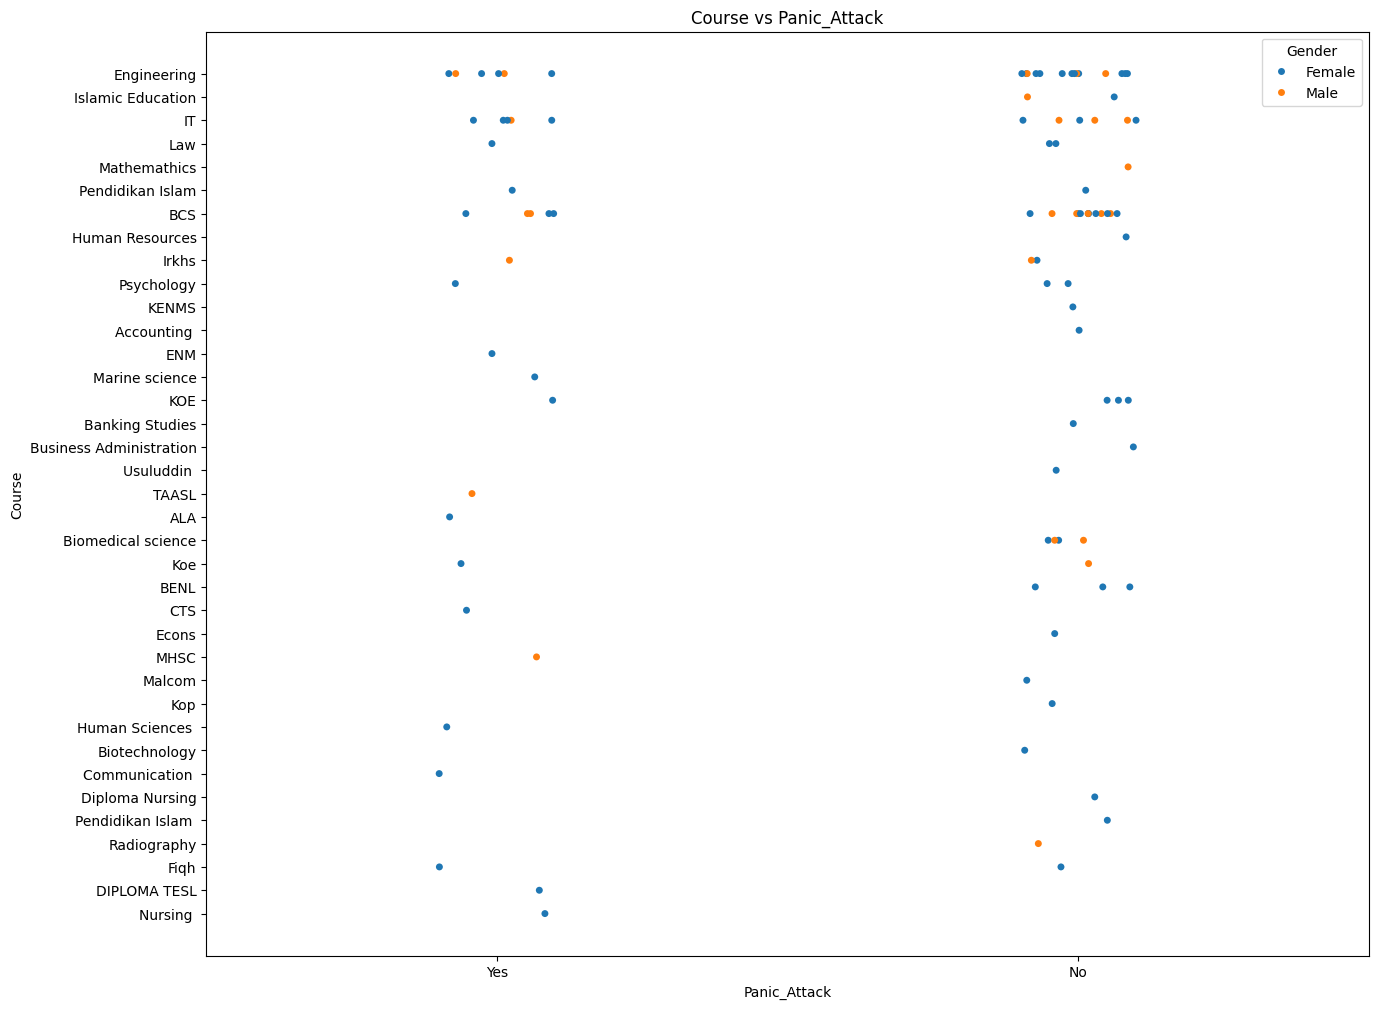

In [593]:
plt.figure(figsize=(15,12))
plot_2 = sns.stripplot(x='Panic_Attack',y='Course',data=df,hue='Gender')
plot_2.set_title("Course vs Panic_Attack")

In [594]:
df[df['Panic_Attack']=='Yes']['Course'].value_counts().nlargest(5)




Course
Engineering         6
IT                  5
BCS                 5
Pendidikan Islam    1
Irkhs               1
Name: count, dtype: int64

Engineering students suffer mostly from panic attacks

In [595]:
df[['Gender','Panic_Attack']].value_counts()

Gender  Panic_Attack
Female  No              50
        Yes             25
Male    No              18
        Yes              8
Name: count, dtype: int64

Females are more prone to Panic attacks than men

In [596]:
df[(df['Anxiety']=='Yes') & (df['Depression']=='Yes') & (df['Panic_Attack']=='Yes')]['Gender'].value_counts()
df[(df['Anxiety']=='Yes') & (df['Depression']=='Yes') & (df['Panic_Attack']=='Yes')]['Year'].value_counts()
df[(df['Anxiety']=='Yes') & (df['Depression']=='Yes') & (df['Panic_Attack']=='Yes')]['Treatment'].value_counts()

Treatment
No     9
Yes    1
Name: count, dtype: int64

this shows that 9 females had all the medical conditions and just 1 male has it 

year 1 ,2,3,4 = 4,3,2,1 respectively 

out of all the 10 people only 1 person went for treatment 

In [597]:
def problem(dataframe):
    list = ['Depression','Anxiety','Panic_Attack']
    for i in list:
        print(df[['Year',i]].groupby('Year')[i].value_counts())
        print('\n')
    
problem(df)

Year  Depression
1     No            29
      Yes           14
2     No            16
      Yes           10
3     No            14
      Yes           10
4     No             7
      Yes            1
Name: count, dtype: int64


Year  Anxiety
1     No         29
      Yes        14
2     No         16
      Yes        10
3     No         16
      Yes         8
4     No          6
      Yes         2
Name: count, dtype: int64


Year  Panic_Attack
1     No              29
      Yes             14
2     No              18
      Yes              8
3     No              14
      Yes             10
4     No               7
      Yes              1
Name: count, dtype: int64




So mostly students in first year suffer from Mental Health.It is found that all the students in first year who had taken the survey suffers from  Anxiety , Depression , Panic Attacks

Final Year (year = 4) students are least prone to Anxiety , Depression ,Panic Attacks .

Depression ,Panic Attacks decreases from year = 1 to year = 4 but data shows that anxiety remains the same in the students of year = 2,3

<Axes: xlabel='Age', ylabel='count'>

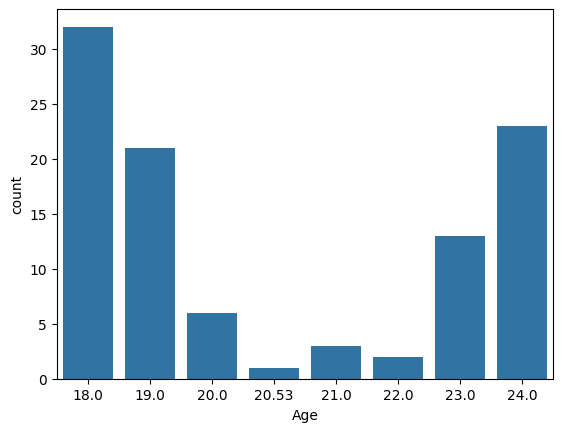

In [598]:
sns.countplot(x='Age',data=df) 

Students of Age = 18,19,24 responded in the survey 


We have to remove the age (20.53) since age cant be fractional   or it might be due to the filing with mean i did from above so i will probably remove it or fill with mode or median

In [599]:
from scipy.stats import shapiro
print(df[['Age','Year']].skew())

print("For age :", shapiro(df[['Age']]))
    
print("For Year :", shapiro(df[['Year']]))


Age     0.378999
Year    0.558130
dtype: float64
For age : ShapiroResult(statistic=np.float64(0.7903945885637167), pvalue=np.float64(1.1008655985245856e-10))
For Year : ShapiroResult(statistic=np.float64(0.8191127275616158), pvalue=np.float64(8.747543434753395e-10))


<Axes: xlabel='Age', ylabel='Density'>

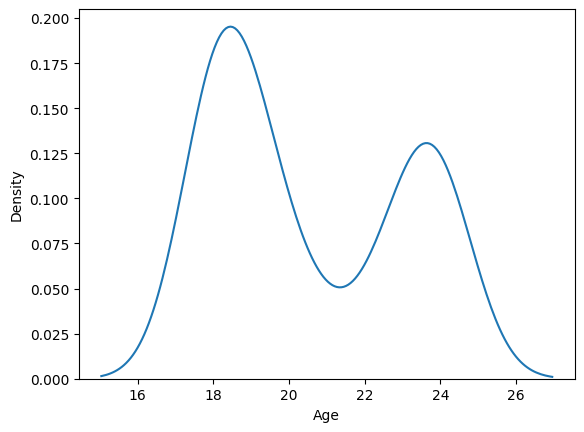

In [600]:
sns.kdeplot(df['Age']) # Non Normal Distribution

<Axes: xlabel='Year', ylabel='Density'>

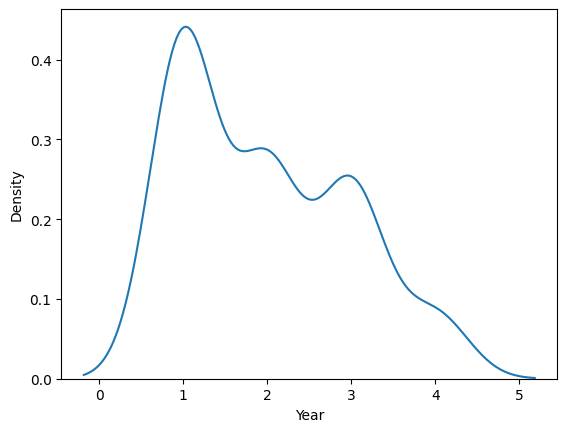

In [601]:
sns.kdeplot(df['Year']) # Non Normal Distribution

In [602]:
df.columns

Index(['Date_Time', 'Gender', 'Age', 'Course', 'Year', 'CGPA',
       'Marital_Status', 'Depression', 'Anxiety', 'Panic_Attack', 'Treatment'],
      dtype='object')

Effect of CGPA on Mental Health

Text(0.5, 1.0, 'Count of CGPA by Depression')

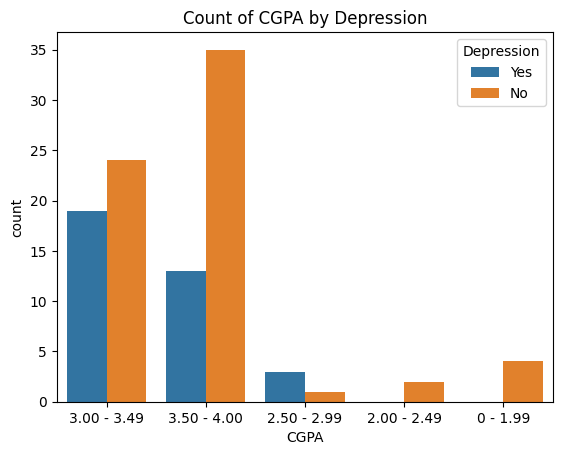

In [603]:
plot_2 = sns.countplot(x='CGPA',data=df,hue='Depression')
plot_2.set_title('Count of CGPA by Depression')


Students securing highest CGPA = 3 to 3.19 suffers from max Depression while students securing CGPA = 2 to 2.49 , 0 to 1.99 have no depression

Most of the students securing high CGPA doen't suffer from depression

Within CGPA = 2.5 to 2.99 most of the students suffers from depression

<Axes: xlabel='CGPA', ylabel='count'>

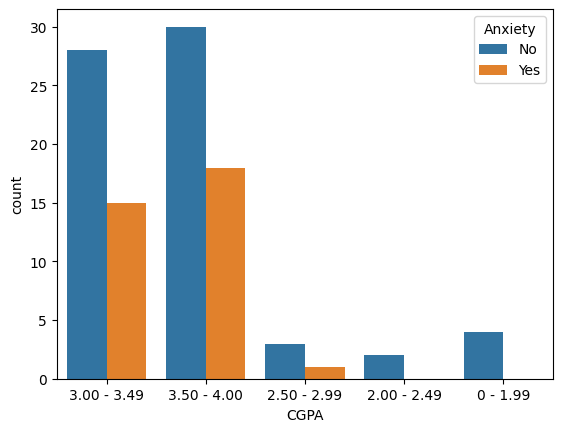

In [604]:
sns.countplot(x='CGPA',data=df,hue='Anxiety')

Almost equal no of students suffers from Anxiety having CGPA = 3 to 3.49 and 3.5 to 

Students securing CGPA = 2 to 2.49 , 0 to 1.99 have no Anxiety



<Axes: xlabel='CGPA', ylabel='count'>

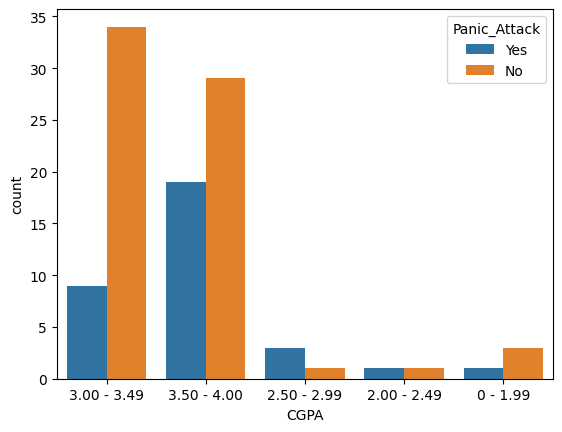

In [605]:
sns.countplot(x='CGPA',data=df,hue='Panic_Attack')

Every student irrespeective of CGPA suffers from panic attack 

Students having CGPA = 2.5 to 2.99 suffers mostly from Panic Attacks 





Effect of Year on CGPA

<Axes: xlabel='Year', ylabel='count'>

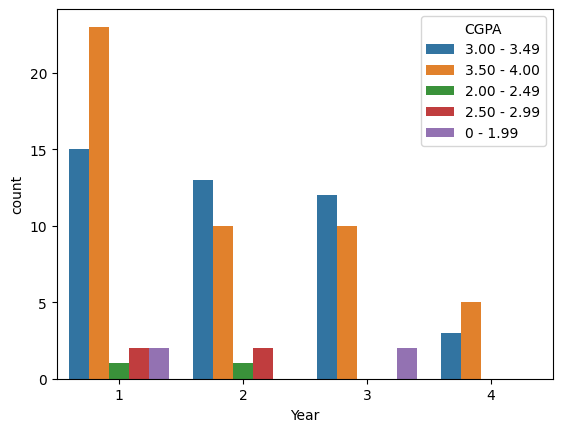

In [606]:
sns.countplot(x='Year',data=df,hue='CGPA')


Most of the First year students secures the highest CGPA 

Students securing the highest CGPA in 2nd and 3rd year are equal

None of the students in final year had scored CGPA within 2 to 2.99

Students in year = 1,2 perform academically much better than the 3rd and 4th year students

<Axes: xlabel='Year', ylabel='count'>

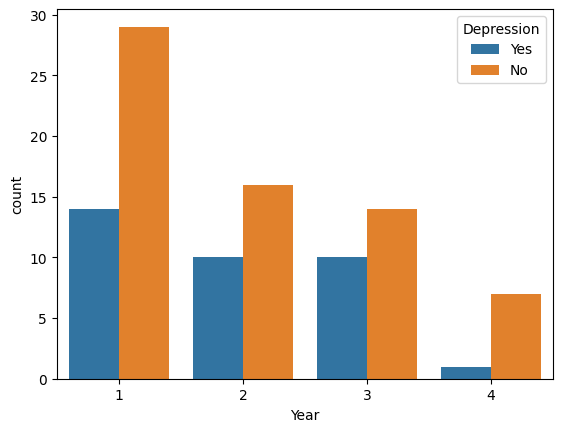

In [607]:
sns.countplot(x='Year',data=df,hue='Depression')


<Axes: xlabel='Year', ylabel='count'>

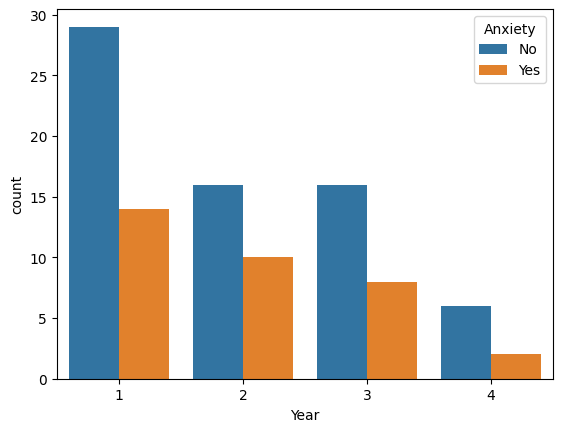

In [608]:
sns.countplot(x='Year',data=df,hue='Anxiety')


<Axes: xlabel='Year', ylabel='count'>

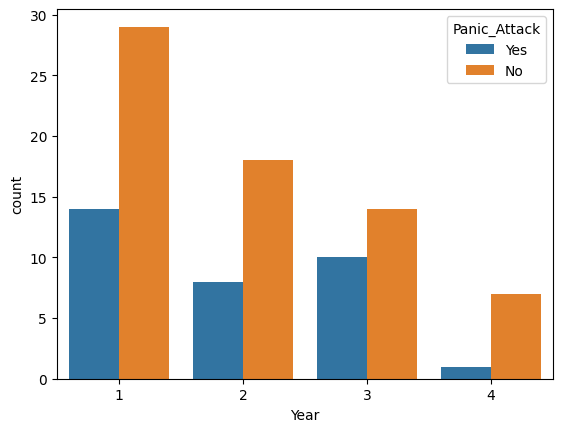

In [609]:
sns.countplot(x='Year',data=df,hue='Panic_Attack')

In [610]:
df = df.drop('Date_Time',axis=1) # Date_Time only shows the time at which the survey was being taken 

Encoding the Categorical Features 

for encoding the binary should use binary encoding but the cgpa column shoud use ordinal encoding likewise the course if i ccan find a way to rank difficulty of courses.

In [611]:

# df['Course'].unique().to_series().to_csv('course_unique.csv', index=False)
pd.DataFrame(df['Course'].unique(), columns=['Course']).to_csv('course_unique.csv', index=False)


In [612]:
from sklearn.preprocessing import  LabelEncoder

enc = LabelEncoder() 

cat_features = df.select_dtypes(include=['object']).columns.tolist()
cat_features.remove('Course')
cat_features.remove('CGPA')

for feature in cat_features:
    df[feature] = enc.fit_transform(df[feature])


In [613]:
df['CGPA'].unique()

array(['3.00 - 3.49', '3.50 - 4.00', '2.50 - 2.99', '2.00 - 2.49',
       '0 - 1.99'], dtype=object)

In [614]:
from sklearn.preprocessing import OrdinalEncoder, OneHotEncoder

ordenc = OrdinalEncoder(categories=[[
    '3.50 - 4.00',
    '3.00 - 3.49',
    '2.50 - 2.99',
    '2.00 - 2.49',
    '0 - 1.99'
]])

df['CGPA'] = ordenc.fit_transform(df[['CGPA']])


Henc = OrdinalEncoder(categories=[[
    "Kop", 
    "Irkhs", 
    "Pendidikan Islam",
    "Islamic Education",
    "Fiqh",
    "Usuluddin",
    "Law",
    "DIPLOMA TESL",
    "TAASL",
    "BENL",
    "ALA",
    "Human Sciences",
    "CTS",
    "Malcom",
    "Communication",
    "Nursing",
    "Diploma Nursing",
    "MHSC",
    "KENMS",
    "Banking Studies",
    "Human Resources",
    "Business Administration",
    "Psychology",
    "Accounting",
    "Econs",
    "ENM",
    "BCS",
    "IT",
    "Mathemathics",
    "Radiography",
    "Marine science",
    "Biotechnology",
    "Biomedical science",
    "KOE",
    "Koe",
    "Engineering"
]
])
df['Course'] = df['Course'].str.strip()

df['Course']= Henc.fit_transform(df[['Course']])


# course_df = pd.DataFrame(course_encoded, 
#                          columns=Henc.get_feature_names_out(['Course']))

# df = df.drop(columns=['Course']).join(course_df)


In [615]:
df_final = df.copy()

<Axes: >

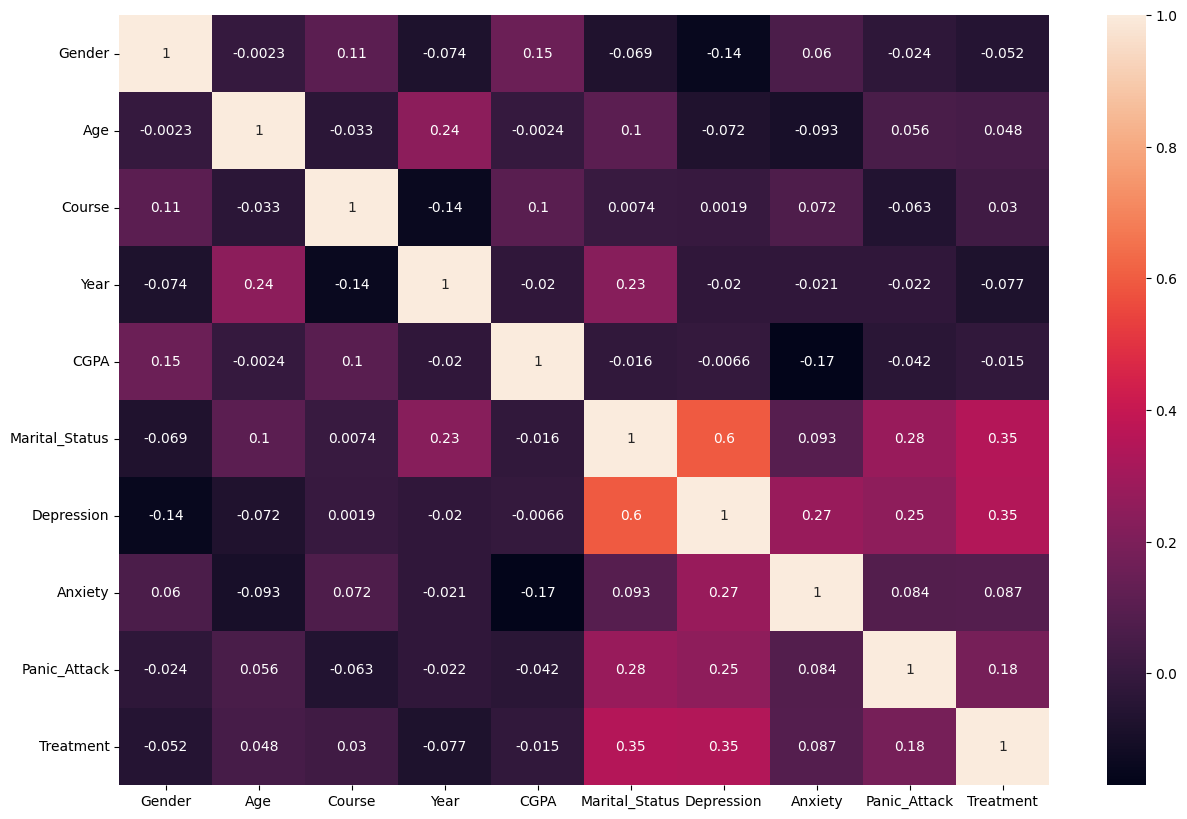

In [616]:
plt.figure(figsize=(15,10))
cor_mat = df.corr(method='pearson')
sns.heatmap(cor_mat,annot=True)

Shows that the marital status and depression are highly corellated 

In [617]:
# import ppscore as pps


# matrix_df = pps.matrix(df_1)[['x', 'y', 'ppscore']].pivot(columns='x', index='y', values='ppscore')
# plt.figure(figsize=(20,10)) 
# sns.heatmap(matrix_df, vmin=0, vmax=1, cmap="Blues", linewidths=0.5, annot=True)
# plt.xlabel('Features')
# plt.ylabel('Target')

Shows that Marital Status effects Depression to a large extent

In [618]:
# def func(dataframe):
#     dep = ['Anxiety','Depression','Panic_Attack']
#     for d in dep:
#         print(f'\n---------{d}--------')
#         print(dataframe[['Marital_Status',d]].groupby(d)['Marital_Status'].value_counts())
#         print('\n')
        
# func(df_1)

For Anxiety : 7 out of 16 married students have anxiety

For Depression : 16 out of 16 married students have depression

Forr Panic Attack : 10 out of 16 married students have Panic attacks


Conclusion : Married students mostly have poor mental health

In [619]:
# df_final[df_final['Age']==20.53].index # df_final doesn't have the fractional age

Mental Health is becomming a common issue among youths including professionals and students. People find it shy to speak and come forward with this ever rising issue in our society which can be detrimental for our economy . Most of the people find it normal to have anxiety and panic attacks hence they neglect undergoing treatment or consult doctors.In many cases people didn't realize even that they are suffering from mental health problems.

Here we are trying to predict the mentality of citizens(may be due to their negligence or going unrecognised) as whether people had seek any specialist for a treatment or not even after suffering from depression , anxiety , panic attacks 

# Trainning Model

In [620]:
# df_2_f = df_2.drop('CGPA',axis=1) # Since CGPA have least or no effect on Treatment seen from PPS and Pearson matrix
# df_2_f.columns

In [621]:
x = df.drop('Treatment',axis=1)
y = df['Treatment']

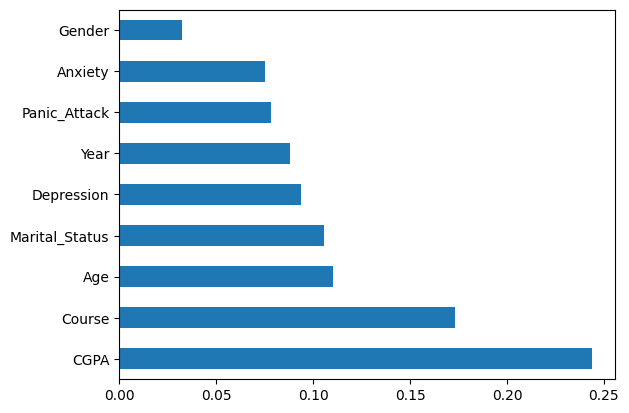

In [622]:
from sklearn.ensemble import ExtraTreesClassifier

model = ExtraTreesClassifier()
model.fit(x,y)

feat_importances = pd.Series(model.feature_importances_, index=x.columns)
feat_importances.nlargest(10).plot(kind='barh')
plt.show()

In [623]:
from sklearn.model_selection import train_test_split

X_train,X_test,Y_train,Y_test = train_test_split(x,y,test_size=0.2,random_state=20)

Performing Oversampling

In [624]:
from imblearn.over_sampling import RandomOverSampler
os=RandomOverSampler(random_state=42)
X_train_os,Y_train_os=os.fit_resample(X_train,Y_train)
# print("The number of classes before fit {}".format(Counter(Y_train)))
# print("The number of classes after fit {}".format(Counter(Y_train_os)))

In [625]:
from sklearn.ensemble import AdaBoostClassifier

ada_ovr = AdaBoostClassifier(n_estimators=300,learning_rate=0.25)
ada_ovr.fit(X_train_os,Y_train_os)

y_pred_ovr = ada_ovr.predict(X_test)
print(classification_report(Y_test,y_pred_ovr))  

              precision    recall  f1-score   support

           0       1.00      0.95      0.97        20
           1       0.50      1.00      0.67         1

    accuracy                           0.95        21
   macro avg       0.75      0.97      0.82        21
weighted avg       0.98      0.95      0.96        21



So we could find that f1 score is pretty good : 0.97 for 0 label and 0.67 for 1 label

So the model is much more accurate in predicting 0 (No) than 1 (Yes)

Randomsampler only generate random duplicate records of the minor category in target variable. So uniqueness of minor data class remains the same as the original.

Hence f1 (0) > f1 (1)


<b>Using Catboost Algorithm</b>

In [626]:
df_final['Treatment'].value_counts() # Imbalanced Dataset

Treatment
0    95
1     6
Name: count, dtype: int64

In [627]:
x_data = df_final.drop('Treatment',axis=1)
y_data = df_final[['Treatment']]

In [628]:
from  sklearn.model_selection import train_test_split

x_train,x_test,y_train,y_test = train_test_split(x_data,y_data,test_size=0.2,random_state = 20)

In [629]:
from imblearn.over_sampling import RandomOverSampler
os=RandomOverSampler(random_state=42)
X_train_os,Y_train_os=os.fit_resample(X_train,Y_train)

In [630]:
X_train_os.dtypes

Gender              int64
Age               float64
Course            float64
Year                int64
CGPA              float64
Marital_Status      int64
Depression          int64
Anxiety             int64
Panic_Attack        int64
dtype: object

In [631]:
Y_train_os.value_counts()

Treatment
0    75
1    75
Name: count, dtype: int64

In [632]:
print("Y_train_os shape:", Y_train_os.shape)
print("\nUnique values in Y_train_os:")
print(Y_train_os.unique())

print("\nValue counts:")
print(Y_train_os.value_counts(dropna=False))


Y_train_os shape: (150,)

Unique values in Y_train_os:
[0 1]

Value counts:
Treatment
0    75
1    75
Name: count, dtype: int64


In [633]:
from catboost import CatBoostClassifier



cat_1 = CatBoostClassifier()
cat_features = [X_train_os.columns.get_loc(col) for col in X_train_os.select_dtypes(include=['int64','float64']).columns]

cat_1.fit(X_train_os,Y_train_os)

Learning rate set to 0.004583
0:	learn: 0.6874938	total: 11.7ms	remaining: 11.7s
1:	learn: 0.6818177	total: 14.3ms	remaining: 7.16s
2:	learn: 0.6768010	total: 23.5ms	remaining: 7.83s
3:	learn: 0.6705252	total: 34.7ms	remaining: 8.63s
4:	learn: 0.6643854	total: 40.7ms	remaining: 8.09s
5:	learn: 0.6591448	total: 45.9ms	remaining: 7.61s
6:	learn: 0.6537145	total: 57.9ms	remaining: 8.21s
7:	learn: 0.6491459	total: 65.8ms	remaining: 8.16s
8:	learn: 0.6435483	total: 69.2ms	remaining: 7.62s
9:	learn: 0.6382759	total: 70.5ms	remaining: 6.98s
10:	learn: 0.6329973	total: 82.1ms	remaining: 7.38s
11:	learn: 0.6279365	total: 89.6ms	remaining: 7.38s
12:	learn: 0.6237735	total: 98.8ms	remaining: 7.5s
13:	learn: 0.6187669	total: 109ms	remaining: 7.67s
14:	learn: 0.6144534	total: 111ms	remaining: 7.28s
15:	learn: 0.6102307	total: 121ms	remaining: 7.45s
16:	learn: 0.6053304	total: 129ms	remaining: 7.49s
17:	learn: 0.6007948	total: 138ms	remaining: 7.55s
18:	learn: 0.5958629	total: 146ms	remaining: 7.56s

In [634]:
y_pred_1 = cat_1.predict(x_test)

print(classification_report(y_test,y_pred_1,zero_division=1))

              precision    recall  f1-score   support

           0       0.95      1.00      0.98        20
           1       1.00      0.00      0.00         1

    accuracy                           0.95        21
   macro avg       0.98      0.50      0.49        21
weighted avg       0.95      0.95      0.93        21



Here we find that the f1 score is 0 for 'Yes' label . 
Since it is the harmonic mean of Precision & Recall hence 0 since Recall = 0 for 'Yes'

This implies that True Positives are 0  so the model could not predict 'Yes' label correctly even for a single time.

Hence CatbostClassifier is not preffered for binary prediction in this case . 

This issue occured due to extreme scarcity of records in survey data

In [635]:
from sklearn.svm import SVC
from sklearn.ensemble import RandomForestClassifier
from sklearn.tree import DecisionTreeClassifier
from xgboost import XGBClassifier
from catboost import CatBoostClassifier
from sklearn.metrics import accuracy_score,f1_score,precision_score,recall_score

In [636]:
models = {
   
    RandomForestClassifier : RandomForestClassifier(),
    DecisionTreeClassifier : DecisionTreeClassifier(),
    XGBClassifier : XGBClassifier(),
    CatBoostClassifier : CatBoostClassifier()
    
}


for i in range(len(list(models))):
    class_models = list(models.values())[i]
    class_models.fit(X_train_os,Y_train_os)         
    
 
    y_test_pred = class_models.predict(x_test)
    
    # Test set Performance
    model_test_accuracy = accuracy_score(y_test, y_test_pred)
    model_test_f1 = f1_score(y_test, y_test_pred,average='weighted')
    model_test_precision = precision_score(y_test, y_test_pred)
    model_test_recall = recall_score(y_test, y_test_pred)
    # classification_rep = classification_report(y_test, y_test_pred)
    
    print(list(models.keys())[i])
    
    print("Model Performance for Test Set")
    print("Accuracy : {:.4f}".format(model_test_accuracy))
    print("F1_score : {:.4f}".format(model_test_f1))
    print("Precision : {:.4f}".format(model_test_precision))
    print("Recall : {:.4f}".format(model_test_recall))
    # print("Classifcatiom Report :", classification_rep)
    
    print(' ======================================================== ')
    print('\n')
    
    

c:\Users\User\Desktop\ABEOKUTA\AI_Engineer\Machine_Learning_Project\amlprojectvenv\Lib\site-packages\sklearn\metrics\_classification.py:1731: UndefinedMetricWarning: Precision is ill-defined and being set to 0.0 due to no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, f"{metric.capitalize()} is", result.shape[0])
c:\Users\User\Desktop\ABEOKUTA\AI_Engineer\Machine_Learning_Project\amlprojectvenv\Lib\site-packages\sklearn\metrics\_classification.py:1731: UndefinedMetricWarning: Precision is ill-defined and being set to 0.0 due to no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, f"{metric.capitalize()} is", result.shape[0])


<class 'sklearn.ensemble._forest.RandomForestClassifier'>
Model Performance for Test Set
Accuracy : 0.9524
F1_score : 0.9292
Precision : 0.0000
Recall : 0.0000


<class 'sklearn.tree._classes.DecisionTreeClassifier'>
Model Performance for Test Set
Accuracy : 0.9524
F1_score : 0.9292
Precision : 0.0000
Recall : 0.0000




c:\Users\User\Desktop\ABEOKUTA\AI_Engineer\Machine_Learning_Project\amlprojectvenv\Lib\site-packages\sklearn\metrics\_classification.py:1731: UndefinedMetricWarning: Precision is ill-defined and being set to 0.0 due to no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, f"{metric.capitalize()} is", result.shape[0])


<class 'xgboost.sklearn.XGBClassifier'>
Model Performance for Test Set
Accuracy : 0.9524
F1_score : 0.9292
Precision : 0.0000
Recall : 0.0000


Learning rate set to 0.004583
0:	learn: 0.6874938	total: 14.6ms	remaining: 14.6s
1:	learn: 0.6818177	total: 27.5ms	remaining: 13.7s
2:	learn: 0.6768010	total: 39.4ms	remaining: 13.1s
3:	learn: 0.6705252	total: 50.6ms	remaining: 12.6s
4:	learn: 0.6643854	total: 78.1ms	remaining: 15.6s
5:	learn: 0.6591448	total: 118ms	remaining: 19.6s
6:	learn: 0.6537145	total: 142ms	remaining: 20.1s
7:	learn: 0.6491459	total: 198ms	remaining: 24.6s
8:	learn: 0.6435483	total: 313ms	remaining: 34.4s
9:	learn: 0.6382759	total: 326ms	remaining: 32.3s
10:	learn: 0.6329973	total: 367ms	remaining: 33s
11:	learn: 0.6279365	total: 378ms	remaining: 31.1s
12:	learn: 0.6237735	total: 397ms	remaining: 30.2s
13:	learn: 0.6187669	total: 427ms	remaining: 30.1s
14:	learn: 0.6144534	total: 438ms	remaining: 28.8s
15:	learn: 0.6102307	total: 451ms	remaining: 27.8s
16:	learn: 0.6053

c:\Users\User\Desktop\ABEOKUTA\AI_Engineer\Machine_Learning_Project\amlprojectvenv\Lib\site-packages\sklearn\metrics\_classification.py:1731: UndefinedMetricWarning: Precision is ill-defined and being set to 0.0 due to no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, f"{metric.capitalize()} is", result.shape[0])


Since F1 score is highest for Cat boost it is preferred over others. 

In [637]:
import pickle

# Save the trained model as .pkl
with open("student_mental_health_model.pkl", "wb") as file:
    pickle.dump(model, file)